<a href="https://colab.research.google.com/github/sokrypton/7.571/blob/main/L2/ORF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Open Reading Frames (ORFs)

**The biological question:**

A genomics lab sequences a gut microbiome and discovers a novel ORF with length >30 amino acids. They hypothesize it encodes a real protein.

**Q: Is an ORF of 30+ amino acids likely to occur by chance?**

**Null hypothesis:** This occurs at random given the codon table (random monkey typing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: The Setup

From the genetic code:
- 64 total codons
- 3 stop codons (UAA, UAG, UGA)
- 61 sense codons (code for amino acids)

In [2]:
n_codons = 64
n_stops = 3

f = n_stops / n_codons  # P(stop codon)

print(f"P(stop codon)  = {n_stops}/{n_codons} = {f:.4f}")
print(f"P(sense codon) = {n_codons - n_stops}/{n_codons} = {1-f:.4f}")

P(stop codon)  = 3/64 = 0.0469
P(sense codon) = 61/64 = 0.9531


## Step 2: Simulate Random ORFs

Imagine a ribosome reading random codons:
- Each codon has probability `f` of being a STOP
- Keep reading until we hit a STOP
- Count how many amino acids we got

In [3]:
def simulate_one_orf():
    """
    Simulate reading random codons until hitting a STOP.
    Returns the length in amino acids.
    """
    length = 0
    while True:
        if np.random.rand() < f:
            # Hit a stop codon!
            return length
        else:
            # Sense codon, keep going
            length += 1

In [4]:
# Simulate many random ORFs
n_simulations = 100000
simulated_lengths = []

for i in range(n_simulations):
    length = simulate_one_orf()
    simulated_lengths.append(length)

simulated_lengths = np.array(simulated_lengths)

print(f"Simulated {n_simulations} random ORFs")
print(f"First 10 lengths: {simulated_lengths[:10]}")
print(f"Mean length: {np.mean(simulated_lengths):.1f} amino acids")

Simulated 100000 random ORFs
First 10 lengths: [29  4  4  7 20 25  4 21  2  9]
Mean length: 20.3 amino acids


## Step 3: Visualize the Distribution

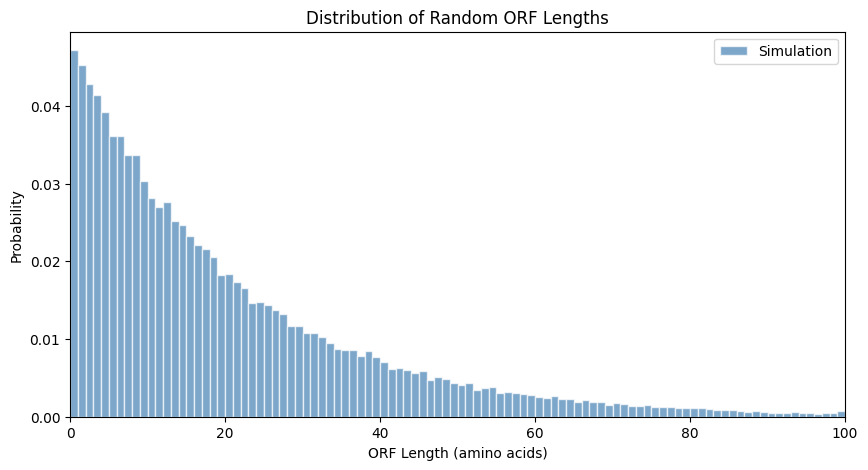

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_lengths, bins=range(0, 101), density=True,
         color='steelblue', edgecolor='white', alpha=0.7, label='Simulation')
plt.xlabel('ORF Length (amino acids)')
plt.ylabel('Probability')
plt.title('Distribution of Random ORF Lengths')
plt.xlim(0, 100)
plt.legend()
plt.show()

## Step 4: This is the Geometric Distribution!

From the lecture:

P(length = N) = (1-f)^N * f

- (1-f)^N = probability of N sense codons in a row
- f = probability of then hitting a stop

Let's overlay the theoretical curve:

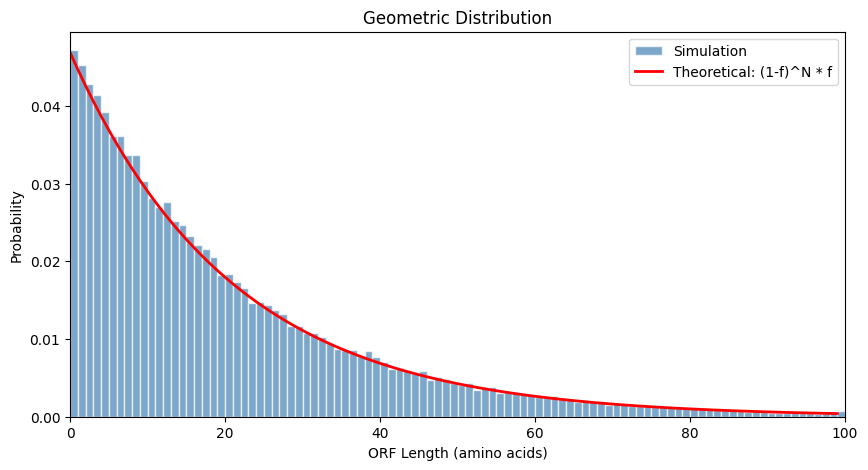

Simulation matches theory!


In [6]:
plt.figure(figsize=(10, 5))

# Simulation
plt.hist(simulated_lengths, bins=range(0, 101), density=True,
         color='steelblue', edgecolor='white', alpha=0.7, label='Simulation')

# Theoretical curve: P(X = N) = (1-f)^N * f
x = np.arange(0, 100)
y = ((1 - f) ** x) * f
plt.plot(x, y, 'r-', linewidth=2, label='Theoretical: (1-f)^N * f')

plt.xlabel('ORF Length (amino acids)')
plt.ylabel('Probability')
plt.title('Geometric Distribution')
plt.xlim(0, 100)
plt.legend()
plt.show()

print("Simulation matches theory!")

## Step 5: Calculate the P-value

**Question:** What is P(length >= 30)?

This is our p-value - the probability of seeing an ORF this long by chance.

In [7]:
threshold = 30

# From simulation
p_value_sim = np.mean(simulated_lengths >= threshold)

print("P-value from Simulation")
print("=" * 40)
print(f"P(length >= {threshold}) = {p_value_sim:.4f} ({p_value_sim*100:.1f}%)")

P-value from Simulation
P(length >= 30) = 0.2360 (23.6%)


## Step 6: Closed-Form Solution

We don't need simulation! From the lecture:

P(length >= N) = (1-f)^N

This is just the probability of getting N sense codons in a row (the stop can come later).

In [8]:
# Closed-form solution
p_value_formula = (1 - f) ** threshold

print("P-value Comparison")
print("=" * 40)
print(f"From simulation:      {p_value_sim:.4f}")
print(f"From formula (1-f)^N: {p_value_formula:.4f}")
print()
print("They match!")

P-value Comparison
From simulation:      0.2360
From formula (1-f)^N: 0.2369

They match!


## Step 7: Visualize the P-value

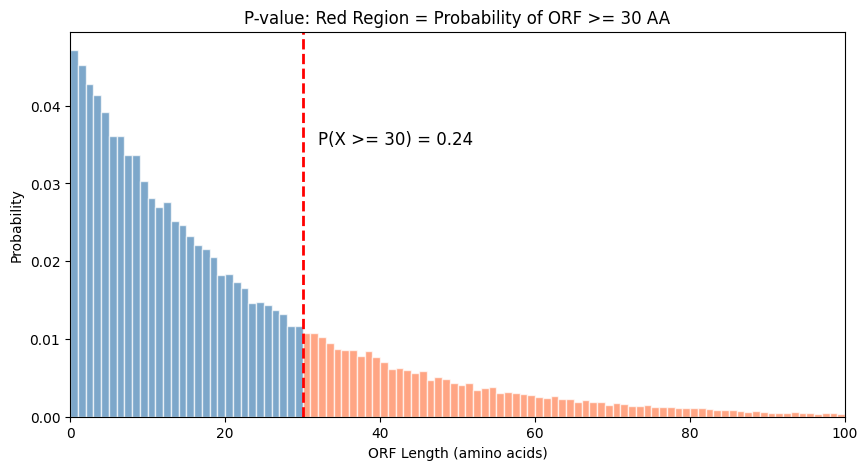

In [9]:
plt.figure(figsize=(10, 5))

# Single histogram, colored by threshold
counts, bins, patches = plt.hist(simulated_lengths, bins=range(0, 102), density=True,
                                  edgecolor='white', alpha=0.7)

# Color bars based on threshold
for i, patch in enumerate(patches):
    if i < threshold:
        patch.set_facecolor('steelblue')
    else:
        patch.set_facecolor('coral')

plt.axvline(threshold, color='red', linestyle='--', linewidth=2)
plt.text(threshold + 2, 0.035, f'P(X >= {threshold}) = {p_value_formula:.2f}', fontsize=12)

plt.xlabel('ORF Length (amino acids)')
plt.ylabel('Probability')
plt.title('P-value: Red Region = Probability of ORF >= 30 AA')
plt.xlim(0, 100)
plt.show()

## Conclusion

**P(random ORF >= 30 AA) = 24%**

This is **not** a small p-value! An ORF of 30 amino acids could easily occur by chance.

**Interpretation:** Finding an ORF of 30+ AA alone is not strong evidence that it's a real protein-coding sequence under selection. We would need additional evidence (e.g., conservation, expression data, longer length).

---
## Summary

| Concept | Formula |
|---------|--------|
| P(stop codon) | f = 3/64 |
| P(sense codon) | 1 - f = 61/64 |
| P(exactly N codons) | (1-f)^N * f |
| P(at least N codons) | (1-f)^N  <-- **This is the p-value!** |

This is the **Geometric Distribution** - same logic as asking "how many coin flips until heads?"